# Predicting Software Defects in Open Source Systems

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs



from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Pretty display for notebooks
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import sklearn.datasets

### Data Collection	
* Identify and download data sources	
* Merge data sets (if necessary)	


In [2]:
# Load the Census dataset
data = pd.read_csv("cm1.csv")
# Success - Display the first record
display(data.head(n=5))

,LOC_BLA0K,BRA0CH_COU0T,CALL_PAIRS,LOC_CODE_A0D_COMME0T,LOC_COMME0TS,CO0DITIO0_COU0T,C1CLOMATIC_COMPLEXIT1,C1CLOMATIC_DE0SIT1,DECISIO0_COU0T,DECISIO0_DE0SIT1,...,0ODE_COU0T,0ORMALIZED_C1LOMATIC_COMPLEXIT1,0UM_OPERA0DS,0UM_OPERATORS,0UM_U0IQUE_OPERA0DS,0UM_U0IQUE_OPERATORS,0UMBER_OF_LI0ES,PERCE0T_COMME0TS,LOC_TOTAL,Defective
0,9,5,3,2,2,8,3,0.16,4,2.0,...,10,0.10,36,66,21,17,31,19.05,19,0
1,19,3,1,2,0,4,2,0.06,2,2.0,...,23,0.04,66,69,34,12,55,5.71,35,0
2,0,9,0,0,0,10,5,0.56,2,5.0,...,9,0.50,10,21,7,9,10,0.00,9,0
3,2,15,2,1,9,24,8,0.19,10,2.4,...,18,0.15,67,120,43,19,54,19.61,42,0
4,5,5,1,0,0,8,3,0.15,4,2.0,...,9,0.12,25,46,17,14,26,0.00,20,0


# Data Exploration

* Review variables, attributes, data types	

In [ ]:
data['Defective'].value_counts()

In [3]:
x = data.iloc[:,:-1] #iloc === integer location (index)
y = data.iloc[:,-1]

	
* Visualizations (box plots, histograms, etc.)	


In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = data.dropna('columns')
    df = data[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = data[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


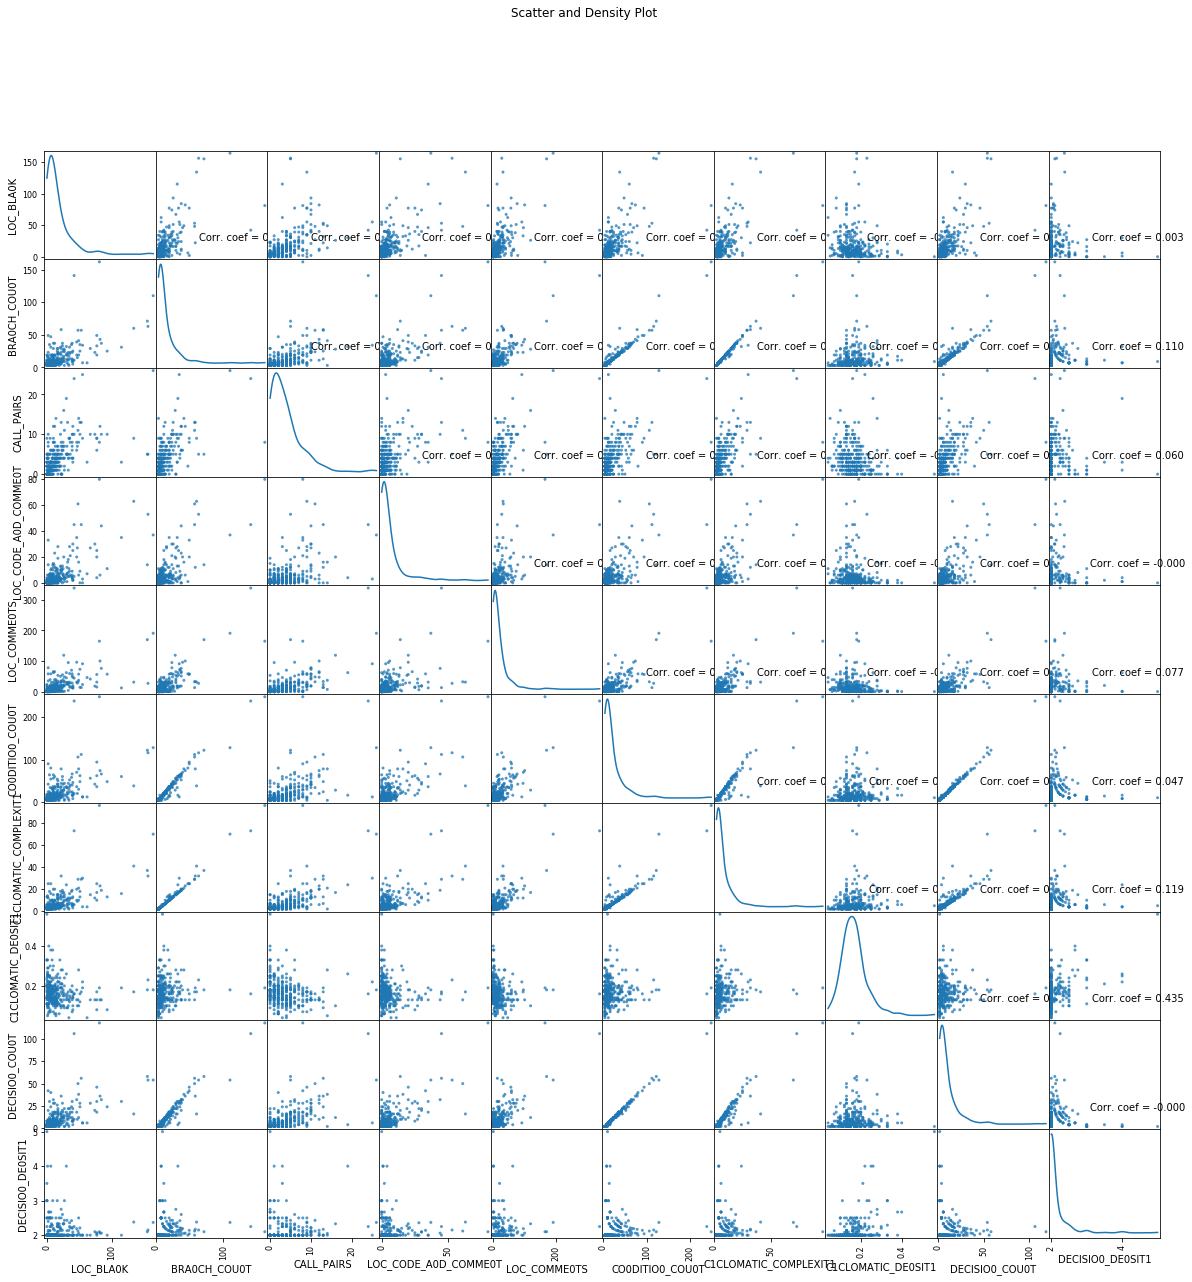

In [5]:
plotScatterMatrix(data, 20, 10)

### * Treatment of outliers	


<function matplotlib.pyplot.show(*args, **kw)>

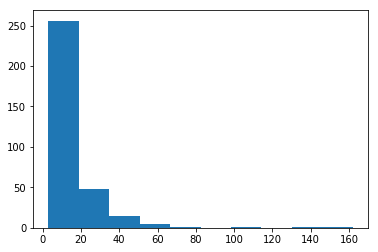

In [6]:
plt.hist(data.BRA0CH_COU0T)
plt.show

In [7]:
lower_bound=0.01
upper_bound=0.95
res=data.BRA0CH_COU0T.quantile([lower_bound,upper_bound])
res


0.01     3.0
0.95    37.0
Name: BRA0CH_COU0T, dtype: float64

In [8]:
true_index=(res.loc[lower_bound] < data.BRA0CH_COU0T.values )& \
(data.BRA0CH_COU0T.values<res.loc[upper_bound])


In [10]:
false_index=~true_index
data.BRA0CH_COU0T[true_index]
mid=np.median(data.BRA0CH_COU0T[true_index])
data[false_index]=mid


<function matplotlib.pyplot.show(*args, **kw)>

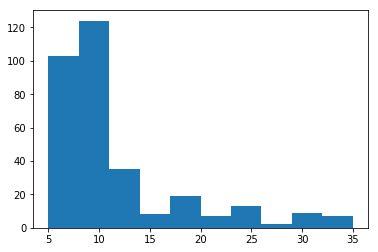

In [12]:
plt.hist(data.BRA0CH_COU0T)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

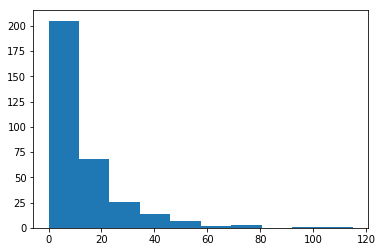

In [14]:
plt.hist(data.LOC_BLA0K)
plt.show

In [15]:
lower_bound=0.01
upper_bound=0.95
res=data.BRA0CH_COU0T.quantile([lower_bound,upper_bound])
res

0.01     5.0
0.95    27.7
Name: BRA0CH_COU0T, dtype: float64

In [16]:
true_index=(res.loc[lower_bound] < data.BRA0CH_COU0T.values )& \
(data.BRA0CH_COU0T.values<res.loc[upper_bound])


In [17]:
false_index=~true_index

In [18]:
data.BRA0CH_COU0T[true_index]
mid=np.median(data.BRA0CH_COU0T[true_index])
data[false_index]=mid


<function matplotlib.pyplot.show(*args, **kw)>

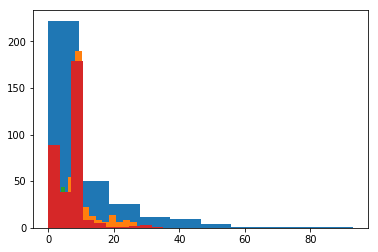

In [19]:
plt.hist(data.LOC_BLA0K)
plt.hist(data.BRA0CH_COU0T)
plt.hist(data.CALL_PAIRS)
plt.hist(data.LOC_CODE_A0D_COMME0T)

plt.show

### Feature Selection	


### splite int traing and test data

### Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xScaler = scaler.fit_transform(x)

In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
yEncoded = enc.fit_transform(y)

Hold _out

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xScaler, yEncoded, test_size = 0.3)

### Build Model 

### SVM

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 40)
svm.fit(x_train, y_train)

# Predicting the Test set results
y_pred = svm.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[82,  2],
       [14,  1]], dtype=int64)

In [25]:
acc=(113+1)/(113+16+1+1)
acc

0.8702290076335878

# knn

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [27]:
k = 3
knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8383838383838383


### Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rf.score(x_test,y_test)

0.8181818181818182

In [30]:
rf.score(x_train,y_train)

0.9912280701754386

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [33]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [34]:
from sklearn import metrics

In [35]:
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.8282828282828283


### Build Model with Cross-validation and evaluation

In [36]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [37]:
score = cross_val_score(knn, xScaler, yEncoded, cv = 10)
print(score)
score.mean()

[0.82352941 0.85294118 0.78787879 0.84848485 0.81818182 0.84375
 0.8125     0.84375    0.875      0.78125   ]


0.8287266042780749

### KNN

In [38]:
y_pred = cross_val_predict(knn, xScaler, yEncoded, cv = 10)
conf_mat = metrics.confusion_matrix(yEncoded, y_pred)
print(conf_mat)

[[266  19]
 [ 37   5]]


In [39]:
#f1 = metrics.f1_score(yEncoded, y_pred)
#print(f1)


In [40]:
acc = metrics.accuracy_score(yEncoded, y_pred)
print(acc)

0.8287461773700305


### Random Forest  wiTH CV

In [41]:
#Random Forest - Ensemble of Descision Trees
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
y_pred = cross_val_predict(rf, xScaler, yEncoded, cv = 10)
conf_mat = metrics.confusion_matrix(yEncoded, y_pred)
print(conf_mat)

[[279   6]
 [ 42   0]]


In [43]:
acc = metrics.accuracy_score(yEncoded, y_pred)
print(acc)

0.8532110091743119


## SVM

In [44]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

In [45]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pred = cross_val_predict(svm, xScaler, yEncoded, cv = 10)
conf_mat = metrics.confusion_matrix(yEncoded, y_pred)
print(conf_mat)

[[281   4]
 [ 41   1]]


In [47]:
Acc=(281+1)/(281+41+1+4)
Acc

0.8623853211009175

### Decision Tree

In [48]:
from sklearn.model_selection import cross_val_predict,cross_val_score
y_pred = cross_val_predict(classifier, x, yEncoded, cv=10)
conf_mat = metrics.confusion_matrix(yEncoded, y_pred)
print(conf_mat)


[[252  33]
 [ 31  11]]


In [49]:
acc = metrics.accuracy_score(yEncoded,y_pred)
print(acc)


0.8042813455657493


# ENsemble Model

In [50]:
#Bagging 

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)    

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [51]:
bg.score(x_train,y_train)

0.9385964912280702

In [52]:
bg.score(x_test,y_test)

0.8181818181818182

In [53]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 0.01)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=5, random_state=None)

In [54]:

adb.score(x_train,y_train)

1.0

In [55]:
adb.score(x_test,y_test)

0.8080808080808081

In [56]:
# Voting Classifier - Multiple Model Ensemble 
rf= RandomForestClassifier(n_estimators=20)
lr = LogisticRegression()
dt = DecisionTreeClassifier()
#sv=SVC(kernel = 'linear', random_state = 0)
svm = SVC(kernel = 'rbf')
sgd= SGDClassifier(max_iter=1000)

In [57]:
evc = VotingClassifier( estimators= [('dt',dt),('svm',svm),('rf',rf),('sgd',sgd),('Lr',lr)], voting = 'hard')

In [58]:
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [59]:
evc.score(x_train,y_train)

0.9342105263157895

In [60]:
evc.score(x_test, y_test)

0.8383838383838383

# Deep Learning 

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
#model.fit(x_train,y_train , epochs=1000)
#print(model.predict([7.0]))